In [ ]:
                                         DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Summary Statistics
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
print("Dataset Shape:", df.shape)

Dataset Shape: (32561, 15)


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [9]:
print("\nCategorical value counts (first few columns):")
for col in df.select_dtypes(include=['object']).columns[:5]:
    print(f"\n{col}:\n", df[col].value_counts().head())



Categorical value counts (first few columns):

workclass:
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Name: count, dtype: int64

education:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
Name: count, dtype: int64

marital_status:
 marital_status
Married-civ-spouse    14976
Never-married         10683
Divorced               4443
Separated              1025
Widowed                 993
Name: count, dtype: int64

occupation:
 occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64

relationship:
 relationship
Husband          13193
Not-in-family     8305
Own-child         5068
Unmarried         3446
Wife              1568
Name: count, dtype: int64


In [15]:
import pandas as pd
import numpy as np
print("\nChecking for '?' entries:")
for col in df.columns:
    print(f"{col}: {(df[col] == '?').sum()}")
df.replace('?', np.nan, inplace=True)
df_dropna = df.dropna()
print("\nAfter dropping missing rows:", df_dropna.shape)


Checking for '?' entries:
age: 0
workclass: 0
fnlwgt: 0
education: 0
education_num: 0
marital_status: 0
occupation: 0
relationship: 0
race: 0
sex: 0
capital_gain: 0
capital_loss: 0
hours_per_week: 0
native_country: 0
income: 0

After dropping missing rows: (32561, 15)


In [11]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv("adult_with_headers.csv")
# Imputation
df_impute = df.copy()

for col in df_impute.columns:
    if df_impute[col].dtype == 'object':  
        
    df_impute[col] = df_impute[col].fillna(df_impute[col].mode()[0])
    else:  
    
        df_impute[col] = df_impute[col].fillna(df_impute[col].median())

print("\nAfter imputation: Missing values per column")
print(df_impute.isnull().sum())
print("\nDataset shape after imputation:", df_impute.shape)
print("\nSample rows after imputation:")
print(df_impute.head())


After imputation: Missing values per column
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Dataset shape after imputation: (32561, 15)

Sample rows after imputation:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse 

In [14]:
from sklearn.preprocessing import StandardScaler
#Scaling 
numeric_cols = df_impute.select_dtypes(include=['int64','float64']).columns

# Standard Scaling 
scaler_std = StandardScaler()
df_std = df_impute.copy()
df_std[numeric_cols] = scaler_std.fit_transform(df_std[numeric_cols])

print("\nFirst 5 rows after Standard Scaling:")
print(df_std[numeric_cols].head())



First 5 rows after Standard Scaling:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling (range 0–1)
scaler_mm = MinMaxScaler()
df_mm = df_impute.copy()
df_mm[numeric_cols] = scaler_mm.fit_transform(df_mm[numeric_cols])

print("\nFirst 5 rows after Min-Max Scaling:")
print(df_mm[numeric_cols].head())


First 5 rows after Min-Max Scaling:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
#  categorical columns
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
#  one-hot vs label encoding
one_hot_cols = [col for col in cat_features if df[col].nunique() < 5]  # few unique values
label_enc_cols = [col for col in cat_features if df[col].nunique() >= 5]  # many unique values
#  Apply One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # avoid dummy variable trap

#  Label Encoding
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

print("Encoding completed. Here's a preview:")
print(df.head())

Encoding completed. Here's a preview:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Male  income_ >50K  
0  

In [22]:
import pandas as pd
df = pd.read_csv("adult_with_headers.csv")
print("Data loaded successfully!")

print(df.head())     


Data loaded successfully!
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0             

In [23]:
#feature engineering
capital_col = [col for col in df.columns if 'capital' in col.lower() and 'gain' in col.lower()]
if capital_col:
    
    print(df[capital_col[0]].head())
else:
    print("No column related to 'capital-gain' found.")


0    2174
1       0
2       0
3       0
4       0
Name: capital_gain, dtype: int64


In [1]:
import ppscore as pps
print("ppscore is working ✅")


ppscore is working ✅


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Seaborn + Matplotlib working ✅")


Seaborn + Matplotlib working ✅



Outlier counts:
  1    95
-1     5
Name: outlier, dtype: int64
Data Shape after removing outliers: (95, 3)

PPS Matrix:
        x          y  ppscore            case  is_valid_score  \
0     age        age      1.0  predict_itself            True   
1     age     salary      0.0      regression            True   
2     age  purchased      0.0      regression            True   
3  salary        age      0.0      regression            True   
4  salary     salary      1.0  predict_itself            True   

                metric  baseline_score   model_score                    model  
0                 None        0.000000      1.000000                     None  
1  mean absolute error    10679.178947  12929.826479  DecisionTreeRegressor()  
2  mean absolute error        0.431579      0.506688  DecisionTreeRegressor()  
3  mean absolute error        6.884211      9.564312  DecisionTreeRegressor()  
4                 None        0.000000      1.000000                     None  


C:\Users\ridhv\AppData\Local\Temp\ipykernel_5232\2998168110.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pps_matrix.pivot("x", "y", "ppscore"),


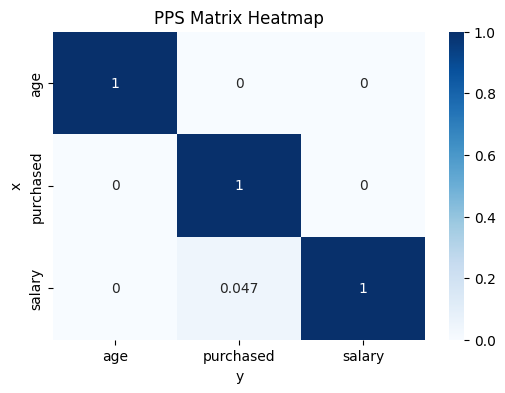


Correlation Matrix:


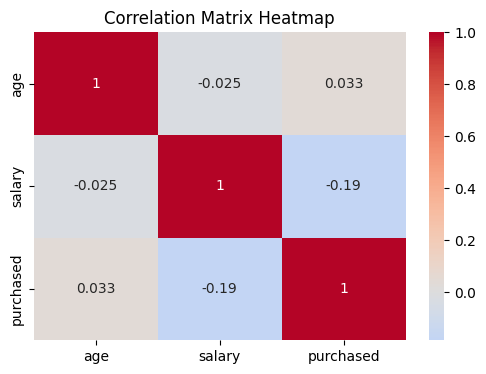

'\n- Correlation measures **linear relationships** only.\n- PPS detects **non-linear and asymmetric** relationships.\n'

In [37]:
# Feature Selection 
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Outlier Detection with Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)  # 5% outliers
df["outlier"] = iso.fit_predict(df[["age", "salary"]])

# -1 = outlier, 1 = normal
print("\nOutlier counts:\n", df["outlier"].value_counts())

# Remove outliers
df_clean = df[df["outlier"] == 1].drop(columns=["outlier"])
print("Data Shape after removing outliers:", df_clean.shape)

# 3. Predictive Power Score (PPS)
print("\nPPS Matrix:")
pps_matrix = pps.matrix(df_clean)
print(pps_matrix.head())

# Plot PPS as Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    pps_matrix.pivot("x", "y", "ppscore"), 
    annot=True, cmap="Blues", cbar=True
)
plt.title("PPS Matrix Heatmap")
plt.show()

# 4. Correlation Matrix
print("\nCorrelation Matrix:")
corr_matrix = df_clean.corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()
# Comparison & Insights

"""
- Correlation measures **linear relationships** only.
- PPS detects **non-linear and asymmetric** relationships.
"""


In [32]:
import ppscore as pps
pps_matrix = pps.matrix(df)
pps_matrix_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

target_column = "target"
pps_target = pps_matrix[pps_matrix['y'] == target_column].sort_values(by='ppscore', ascending=False)

print("\n🔹 Predictive Power Score for target column:")
print(pps_target)



🔹 Predictive Power Score for target column:
Empty DataFrame
Columns: [x, y, ppscore, case, is_valid_score, metric, baseline_score, model_score, model]
Index: []
